In [98]:
import uproot	
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import awkward as ak
from scipy.optimize import curve_fit
%matplotlib inline

In [99]:
#file = uproot.open("tracking_losses_ntuple_Bd2KstEE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")
file = uproot.open("tracking_losses_ntuple_B_match_default_weights.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")


#selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()
found = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost) & (allcolumns.fromSignal)] #B: 9056
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost) & (allcolumns.fromSignal)] #B: 1466

ak.num(found, axis=0) + ak.num(lost, axis=0)
#ak.count(found, axis=None)	

31618

In [100]:
#found

brem_e_f = found["brem_photons_pe"]
brem_z_f = found["brem_vtx_z"]
brem_x_f = found["brem_vtx_x"]
e_f = found["energy"]
length_f = found["brem_vtx_z_length"]

brem_f = ak.ArrayBuilder()

for itr in range(ak.num(found,axis=0)):
    brem_f.begin_record()
    #[:,"energy"] energy
    brem_f.field("energy").append(e_f[itr])
    #[:,"photon_length"] number of vertices
    brem_f.field("photon_length").integer(length_f[itr])
    #[:,"brem_photons_pe",:] photon energy 
    brem_f.field("brem_photons_pe").append(brem_e_f[itr])
    #[:,"brem_vtx_z",:] brem vtx z
    brem_f.field("brem_vtx_x").append(brem_x_f[itr])
    brem_f.field("brem_vtx_z").append(brem_z_f[itr])
    brem_f.end_record()

brem_f = ak.Array(brem_f)

#lost

brem_e_l = lost["brem_photons_pe"]
brem_z_l = lost["brem_vtx_z"]
brem_x_l = lost["brem_vtx_x"]
e_l = lost["energy"]
length_l = lost["brem_vtx_z_length"]

brem_l = ak.ArrayBuilder()

for itr in range(ak.num(lost,axis=0)):
    brem_l.begin_record()
    #[:,"energy"] energy
    brem_l.field("energy").append(e_l[itr])
    #[:,"photon_length"] number of vertices
    brem_l.field("photon_length").integer(length_l[itr])
    #[:,"brem_photons_pe",:] photon energy 
    brem_l.field("brem_photons_pe").append(brem_e_l[itr])
    #[:,"brem_vtx_z",:] brem vtx z
    brem_l.field("brem_vtx_x").append(brem_x_l[itr])
    brem_l.field("brem_vtx_z").append(brem_z_l[itr])
    brem_l.end_record()

brem_l = ak.Array(brem_l)

In [101]:
photon_cut = 0

cut_brem_found = ak.ArrayBuilder()

for itr in range(ak.num(brem_f, axis=0)):
    cut_brem_found.begin_record()
    cut_brem_found.field("energy").real(brem_f[itr,"energy"])
    
    cut_brem_found.field("brem_photons_pe")
    cut_brem_found.begin_list()
    for jentry in range(brem_f[itr, "photon_length"]):
        if brem_f[itr, "brem_vtx_z", jentry]>5000 or brem_f[itr, "brem_photons_pe", jentry]<photon_cut:
            continue
        else:
            cut_brem_found.real(brem_f[itr,"brem_photons_pe", jentry])
            
            #cut_brem_found.field("brem_vtx_z").real(brem_f[itr, "brem_vtx_z",jentry])
    cut_brem_found.end_list()

    cut_brem_found.field("brem_vtx_x")
    cut_brem_found.begin_list()
    for jentry in range(brem_f[itr, "photon_length"]):
        if brem_f[itr, "brem_vtx_z", jentry]>5000 or brem_f[itr, "brem_photons_pe", jentry]<photon_cut:
            continue
        else:
            cut_brem_found.real(brem_f[itr, "brem_vtx_x",jentry])
    cut_brem_found.end_list()
    
    cut_brem_found.field("brem_vtx_z")
    cut_brem_found.begin_list()
    for jentry in range(brem_f[itr, "photon_length"]):
        if brem_f[itr, "brem_vtx_z", jentry]>5000 or brem_f[itr, "brem_photons_pe", jentry]<photon_cut:
            continue
        else:
            cut_brem_found.real(brem_f[itr, "brem_vtx_z",jentry])
    cut_brem_found.end_list()
    

    
    cut_brem_found.end_record()

tuple_found = ak.Array(cut_brem_found)



cut_brem_lost = ak.ArrayBuilder()

for itr in range(ak.num(brem_l, axis=0)):
    cut_brem_lost.begin_record()
    cut_brem_lost.field("energy").real(brem_l[itr,"energy"])
    
    
    cut_brem_lost.field("brem_photons_pe")
    cut_brem_lost.begin_list()
    for jentry in range(brem_l[itr, "photon_length"]):
        if brem_l[itr, "brem_vtx_z", jentry]>5000 or brem_l[itr, "brem_photons_pe", jentry]<photon_cut:
            continue
        else:
            cut_brem_lost.real(brem_l[itr,"brem_photons_pe", jentry])
            
            #cut_brem_found.field("brem_vtx_z").real(brem_f[itr, "brem_vtx_z",jentry])
    cut_brem_lost.end_list()

    cut_brem_lost.field("brem_vtx_x")
    cut_brem_lost.begin_list()
    for jentry in range(brem_l[itr, "photon_length"]):
        if brem_l[itr, "brem_vtx_z", jentry]>5000 or brem_l[itr, "brem_photons_pe", jentry]<photon_cut:
            continue
        else:
            cut_brem_lost.real(brem_l[itr, "brem_vtx_x",jentry])
    cut_brem_lost.end_list()
    
    cut_brem_lost.field("brem_vtx_z")
    cut_brem_lost.begin_list()
    for jentry in range(brem_l[itr, "photon_length"]):
        if brem_l[itr, "brem_vtx_z", jentry]>5000 or brem_l[itr, "brem_photons_pe", jentry]<photon_cut:
            continue
        else:
            cut_brem_lost.real(brem_l[itr, "brem_vtx_z",jentry])
    cut_brem_lost.end_list()
        
    cut_brem_lost.end_record()

tuple_lost = ak.Array(cut_brem_lost)


In [102]:
#data in cut_brem_found and cut_brem_lost

length_found = ak.num(tuple_found["brem_photons_pe"],axis=-1)
length_lost = ak.num(tuple_lost["brem_photons_pe"], axis=-1)

tuple_found[1]


<Record {energy: 3.26e+04, ...} type='{energy: float64, brem_photons_pe: va...'>

In [103]:
tuple_found[3]

<Record {energy: 2.12e+04, ...} type='{energy: float64, brem_photons_pe: va...'>

In [104]:
Z_found = ak.to_numpy(ak.sum(tuple_found["brem_photons_pe"],axis=-1,keepdims=False)) / ak.to_numpy(tuple_found["energy"])
Z_lost = ak.to_numpy(ak.sum(tuple_lost["brem_photons_pe"],axis=-1,keepdims=False)) / ak.to_numpy(tuple_lost["energy"])

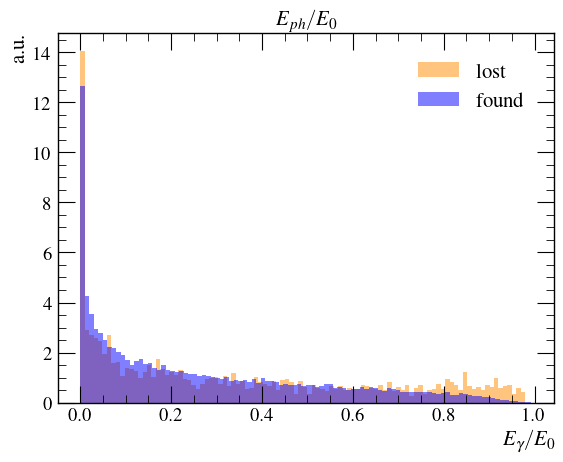

In [105]:
plt.hist(Z_lost, bins=100, density=True, alpha=0.5, histtype='bar', color="darkorange", label="lost")
plt.hist(Z_found, bins=100, density=True, alpha=0.5, histtype='bar', color="blue", label="found")
plt.xlabel(r"$E_\gamma/E_0$")
plt.ylabel("a.u.")
plt.title(r'$E_{ph}/E_0$')
plt.legend()
plt.show()

In [106]:
brem_x_found = ak.to_numpy(ak.flatten(tuple_found["brem_vtx_x"]))
brem_z_found = ak.to_numpy(ak.flatten(tuple_found["brem_vtx_z"]))

brem_x_lost = ak.to_numpy(ak.flatten(tuple_lost["brem_vtx_x"]))
brem_z_lost = ak.to_numpy(ak.flatten(tuple_lost["brem_vtx_z"]))

n_found = len(brem_x_found)
n_lost = len(brem_x_lost)
print("found: ", n_found, ", lost: ", n_lost)
stretch_factor = n_lost/n_found
print(stretch_factor)

found:  79481 , lost:  7087
0.08916596419270015


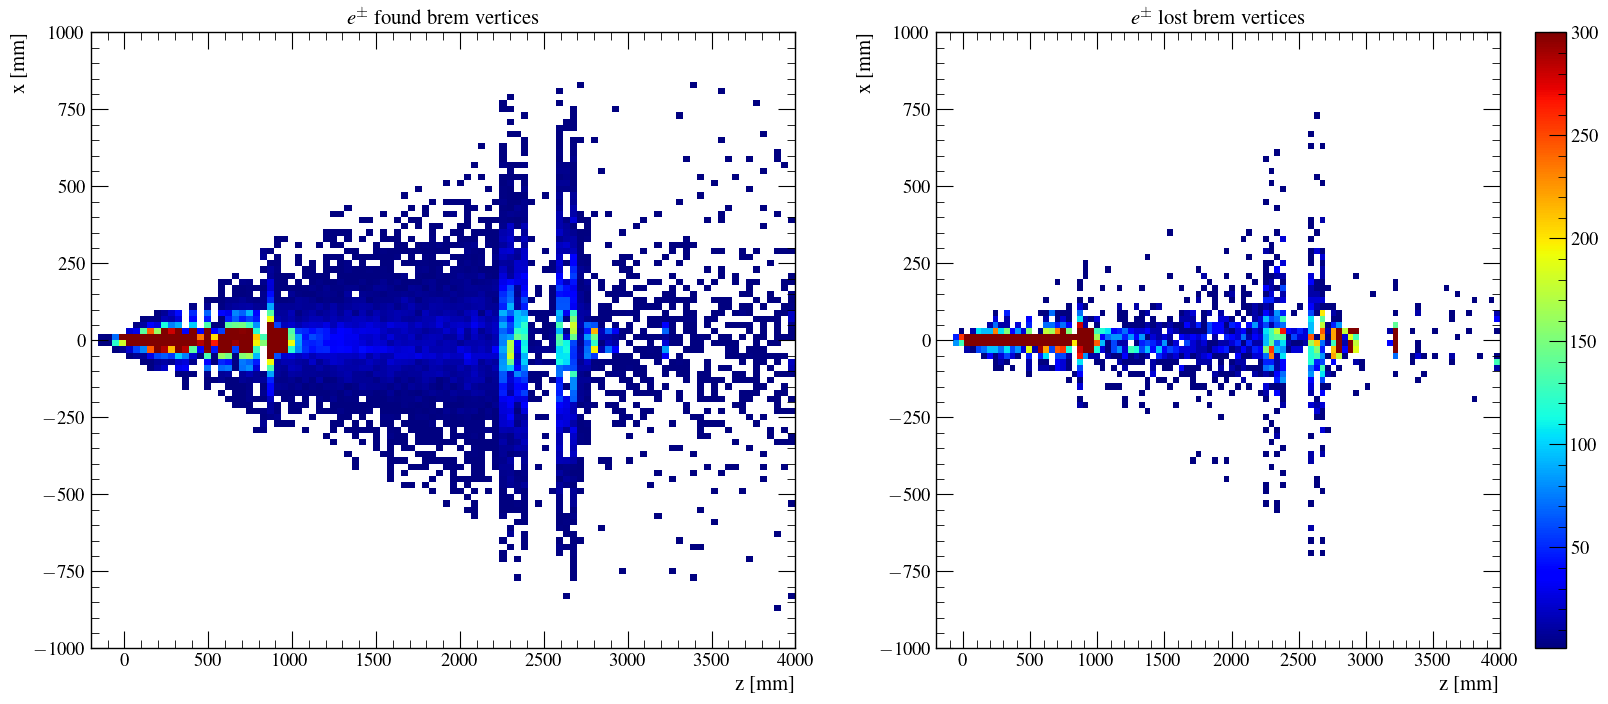

In [107]:
vmax=300
nbins=100

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))


a0 = ax0.hist2d(brem_z_found, brem_x_found, density=False, bins=nbins,  cmap=plt.cm.jet, cmin=1, vmax=vmax, range=[[-200,4000],[-1000,1000]])
ax0.set_ylim(-1000,1000)
ax0.set_xlim(-200,4000)
ax0.set_xlabel("z [mm]")
ax0.set_ylabel("x [mm]")
ax0.set_title(r"$e^\pm$ found brem vertices")

a1 = ax1.hist2d(brem_z_lost, brem_x_lost, density=False, bins=nbins, cmap=plt.cm.jet, cmin=1,vmax=vmax*stretch_factor, range=[[-200,4000],[-1000,1000]])
ax1.set_ylim(-1000,1000)
ax1.set_xlim(-200,4000)
ax1.set_xlabel("z [mm]")
ax1.set_ylabel("x [mm]")
ax1.set_title(r"$e^\pm$ lost brem vertices")
#ax1.set(xlim=(0,4000), ylim=(-1000,1000))

plt.colorbar(a0[3], ax=ax1)

plt.show()

In [109]:
tuple_found[1]

<Record {energy: 3.26e+04, ...} type='{energy: float64, brem_photons_pe: va...'>

In [118]:



for jelec in range(ak.num(tuple_lost,axis=0)):
    for jphoton in range(ak.num(tuple_lost[jelec]["brem_photons_pe"],axis=0)):
        print(jphoton)

0
0
1
0
1
2
0
1
2
3
0
1
2
0
0
1
2
3
0
1
0
1
0
1
2
3
4
0
0
1
2
3
4
0
1
2
3
0
1
2
3
0
0
1
2
3
4
5
6
7
0
1
2
3
0
0
1
2
3
4
0
1
2
0
0
1
2
3
4
5
0
1
2
3
4
5
6
7
0
1
2
0
1
2
0
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
0
0
1
0
0
1
0
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
0
1
2
3
4
0
1
2
3
4
5
0
1
0
1
0
1
2
3
0
0
1
2
3
0
0
0
1
0
1
2
3
0
1
2
0
1
2
3
0
0
1
2
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
0
1
0
1
2
3
4
5
6
0
1
2
3
0
1
2
3
4
5
6
7
0
0
0
1
2
3
4
5
6
0
1
2
0
1
2
0
1
2
0
0
1
2
3
4
0
1
2
3
0
1
0
1
0
1
2
0
1
2
3
0
1
2
3
4
5
0
1
2
3
0
1
2
3
4
5
0
1
2
3
4
0
1
0
1
2
3
4
5
6
7
0
1
2
3
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
0
1
2
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
0
0
1
2
0
1
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
0
1
2
0
1
2
0
0
1
0
0
1
2
3
4
0
0
1
2
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
0
0
0
1
2
0
1
2
3
0
1
2
0
1
0
1
2
3
4
0
1
0
1
2
3
4
5
6
0
1
0
1
2
3
4
0
1
2
3
4
5
6
0
0
0
1
2
0
1
2
3
4
0
1
0
1
0
1
0
0
0
1
2
0
0
1
2
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
0
0
1
0
1
2
3
4
5
0
1
0
1
2
0


In [56]:
cut = 4000

tf = tuple_found[ak.sum(tuple_found["brem_photons_pe"],axis=-1,keepdims=False)>cut]
tl = tuple_lost[ak.sum(tuple_lost["brem_photons_pe"],axis=-1,keepdims=False)>cut]

cut_x_found = ak.to_numpy(ak.flatten(tf["brem_vtx_x"]))
cut_z_found = ak.to_numpy(ak.flatten(tf["brem_vtx_z"]))

cut_x_lost = ak.to_numpy(ak.flatten(tf["brem_vtx_x"]))
cut_z_lost = ak.to_numpy(ak.flatten(tf["brem_vtx_z"]))

# how many tracks of all are included?
ratio_f = tuple_found[ak.sum(tuple_found["brem_photons_pe"],axis=-1,keepdims=False)>cut]
ratio_l = tuple_lost[ak.sum(tuple_lost["brem_photons_pe"],axis=-1,keepdims=False)>cut]


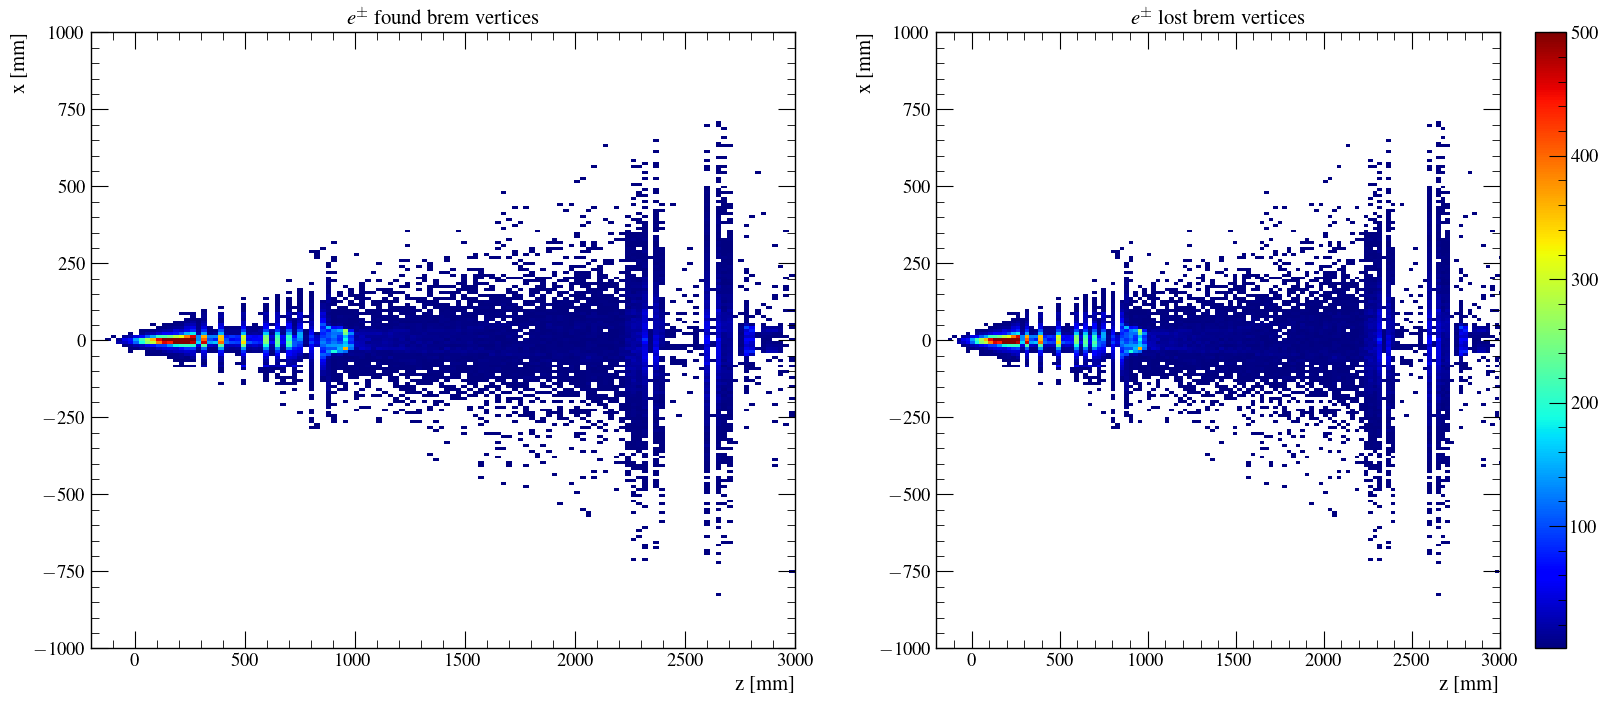

In [57]:
vmax=500


fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))


a0 = ax0.hist2d(cut_z_found, cut_x_found, density=False, bins=200,  cmap=plt.cm.jet, cmin=1, vmax =vmax)
ax0.set_ylim(-1000,1000)
ax0.set_xlim(-200,4000)
ax0.set_xlabel("z [mm]")
ax0.set_ylabel("x [mm]")
ax0.set_title(r"$e^\pm$ found brem vertices")

a1 = ax1.hist2d(cut_z_lost, cut_x_lost, density=False, bins=200, cmap=plt.cm.jet, cmin=1, vmax=vmax)
ax1.set_ylim(-1000,1000)
ax1.set_xlim(-200,4000)
ax1.set_xlabel("z [mm]")
ax1.set_ylabel("x [mm]")
ax1.set_title(r"$e^\pm$ lost brem vertices")
#ax1.set(xlim=(0,4000), ylim=(-1000,1000))

plt.colorbar(a0[3], ax=ax1)

plt.show()